## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score

## Importing csv file

In [2]:
df1 = pd.read_csv("Summary of Weather.csv")
df2 = pd.read_csv("Weather Station Locations.csv")

C:\Users\manav\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Combining Datasets

In [3]:
dataset = pd.merge(df1, df2, left_on='STA', right_on='WBAN')

In [4]:
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,RVG,WTE,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3


In [5]:
dataset.shape

(119040, 39)

In [6]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,PGT,SD3,RHX,RHN,RVG,WTE,WBAN,ELEV,Latitude,Longitude
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,525.000000,0.0,0.0,0.0,0.0,0.0,119040.000000,119040.000000,119040.000000,119040.000000
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,12.085333,NaN,NaN,NaN,NaN,NaN,29659.435795,416.380385,17.553536,-15.787356
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,5.731328,NaN,NaN,NaN,NaN,NaN,20953.209402,1696.652854,19.763832,88.764354
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,10001.000000,1.000000,-27.600000,-175.000000
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,8.500000,NaN,NaN,NaN,NaN,NaN,11801.000000,9.000000,6.750000,-79.500000
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,11.600000,NaN,NaN,NaN,NaN,NaN,22508.000000,26.000000,17.900000,-22.616667
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,15.000000,NaN,NaN,NaN,NaN,NaN,33501.000000,93.000000,27.683333,44.866667
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,23.900000,NaN,NaN,NaN,NaN,NaN,82506.000000,9999.000000,67.016667,177.366667


## Data Molding(Encoding)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119040 entries, 0 to 119039
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STA               119040 non-null  int64  
 1   Date              119040 non-null  object 
 2   Precip            119040 non-null  object 
 3   WindGustSpd       532 non-null     float64
 4   MaxTemp           119040 non-null  float64
 5   MinTemp           119040 non-null  float64
 6   MeanTemp          119040 non-null  float64
 7   Snowfall          117877 non-null  object 
 8   PoorWeather       34237 non-null   object 
 9   YR                119040 non-null  int64  
 10  MO                119040 non-null  int64  
 11  DA                119040 non-null  int64  
 12  PRCP              117108 non-null  object 
 13  DR                533 non-null     float64
 14  SPD               532 non-null     float64
 15  MAX               118566 non-null  float64
 16  MIN               11

### Deleting unnecessary features

In [8]:
del dataset['Date'] 
del dataset['WindGustSpd'] 
del dataset['DR']
del dataset['SPD'] 
del dataset['SND']
del dataset['FT']
del dataset['FB']
del dataset['FTI'] 
del dataset['ITH']
del dataset['PGT'] 
del dataset['TSHDSBRSGF']
del dataset['SD3']
del dataset['RHX'] 
del dataset['RHN'] 
del dataset['RVG'] 
del dataset['NAME'] 
del dataset['STATE/COUNTRY ID'] 
del dataset['LON']
del dataset['Latitude']
del dataset['Longitude']
del dataset['WBAN']
del dataset['STA']
del dataset['LAT']
del dataset['WTE']

In [9]:
dataset.shape

(119040, 15)

In [10]:
dataset.describe()

,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA,ELEV
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,118566.000000,118572.000000,118542.000000,119040.000000
mean,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,81.003745,64.273808,72.644843,416.380385
std,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,14.869361,14.481498,14.211082,1696.652854
min,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,-28.000000,-37.000000,-32.000000,1.000000
25%,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,78.000000,59.000000,69.000000,9.000000
50%,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,85.000000,70.000000,78.000000,26.000000
75%,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,89.000000,74.000000,81.000000,93.000000
max,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,122.000000,94.000000,104.000000,9999.000000


In [11]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119040 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Precip       119040 non-null  object 
 1   MaxTemp      119040 non-null  float64
 2   MinTemp      119040 non-null  float64
 3   MeanTemp     119040 non-null  float64
 4   Snowfall     117877 non-null  object 
 5   PoorWeather  34237 non-null   object 
 6   YR           119040 non-null  int64  
 7   MO           119040 non-null  int64  
 8   DA           119040 non-null  int64  
 9   PRCP         117108 non-null  object 
 10  MAX          118566 non-null  float64
 11  MIN          118572 non-null  float64
 12  MEA          118542 non-null  float64
 13  SNF          117877 non-null  object 
 14  ELEV         119040 non-null  int64  
dtypes: float64(6), int64(4), object(5)
memory usage: 14.5+ MB
None


In [12]:
# Removing unnecessary values

print(dataset['Snowfall'].unique())
print(len(dataset.loc[dataset['Snowfall']=='#VALUE!'].index))
dataset.drop(dataset.loc[dataset['Snowfall']=='#VALUE!'].index, inplace=True)

[0.0 nan '0' '22.86' '33.02' '30.48' '2.54' '5.08' '10.16' '7.62' '20.32'
 '15.24' '17.78' '12.7' '25.4' '27.94' '43.18' '38.1' '45.72' '53.34'
 '58.42' '66.04' '76.2' '81.28' '73.66' '63.5' '50.8' '48.26' '60.96'
 '55.88' '35.56' '78.74' '40.64' '86.36' '83.82' '68.58' '#VALUE!' 10.16
 7.62 15.24 2.54 5.08 12.7]
44


In [13]:
dataset['Snowfall'].describe()

count     117833.0
unique        41.0
top            0.0
freq       86090.0
Name: Snowfall, dtype: float64

In [14]:
print(dataset['Snowfall'].unique())
print(len(dataset.loc[dataset['Snowfall']==0].index))

[0.0 nan '0' '22.86' '33.02' '30.48' '2.54' '5.08' '10.16' '7.62' '20.32'
 '15.24' '17.78' '12.7' '25.4' '27.94' '43.18' '38.1' '45.72' '53.34'
 '58.42' '66.04' '76.2' '81.28' '73.66' '63.5' '50.8' '48.26' '60.96'
 '55.88' '35.56' '78.74' '40.64' '86.36' '83.82' '68.58' 10.16 7.62 15.24
 2.54 5.08 12.7]
86090


In [15]:
# Removing unnecessary values

dataset['Snowfall'] = dataset['Snowfall'].astype(str)
print(len(dataset.loc[dataset['Snowfall']=='nan'].index))
dataset.drop(dataset.loc[dataset['Snowfall']=='nan'].index, inplace=True)

1163


In [16]:
print(len(dataset.loc[dataset['Snowfall']=='nan'].index))

0


In [17]:
dataset['Snowfall'] = dataset['Snowfall'].astype(float)

In [18]:
# Claasifiaction function for snowfall

classification_func = lambda x : 0 if float(x)==float(0) else 1

In [19]:
# Encoding Snowfall Column
dataset['Snowfall'] = dataset['Snowfall'].map(classification_func).astype(float)

In [20]:
dataset['Snowfall'].describe()

count    117833.000000
mean          0.018187
std           0.133627
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Snowfall, dtype: float64

In [21]:
dataset['Snowfall'].unique()

array([0., 1.])

In [22]:
print(len(dataset.loc[dataset["Snowfall"]==float(0)].index))
print(len(dataset.loc[dataset["Snowfall"]==float(1)].index))

115690
2143


In [23]:
print(dataset.shape)
dataset.head()

(117833, 15)


,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,ELEV
0,1.016,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,78.0,72.0,75.0,0,62
1,0,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,84.0,71.0,78.0,0,62
2,2.54,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,79.0,72.0,76.0,0,62
3,2.54,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,80.0,72.0,76.0,0,62
4,0,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,80.0,71.0,76.0,0,62


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117833 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Precip       117833 non-null  object 
 1   MaxTemp      117833 non-null  float64
 2   MinTemp      117833 non-null  float64
 3   MeanTemp     117833 non-null  float64
 4   Snowfall     117833 non-null  float64
 5   PoorWeather  33683 non-null   object 
 6   YR           117833 non-null  int64  
 7   MO           117833 non-null  int64  
 8   DA           117833 non-null  int64  
 9   PRCP         116130 non-null  object 
 10  MAX          117371 non-null  float64
 11  MIN          117378 non-null  float64
 12  MEA          117348 non-null  float64
 13  SNF          117833 non-null  object 
 14  ELEV         117833 non-null  int64  
dtypes: float64(7), int64(4), object(4)
memory usage: 14.4+ MB


In [25]:
# Removing unnecessary values

print(dataset['Precip'].unique())
print(len(dataset.loc[dataset['Precip']=='T'].index))
dataset.drop(dataset.loc[dataset['Precip']=='T'].index, inplace=True)
#dataset['Precip'] = dataset['Precip'].astype(float)
#dataset.loc[dataset['Precip']=='T']=float(1)

['1.016' '0' '2.54' 'T' '3.556' '0.508' '0.254' '1.778' '3.302' '0.762'
 '5.588' '5.08' '2.032' '25.654' '40.132' '19.05' '23.876' '4.064'
 '12.192' '2.794' '33.274' '19.304' '47.752' '6.35' '3.048' '8.382'
 '10.16' '27.178' '30.48' '45.212' '10.668' '15.494' '57.658' '58.166'
 '11.43' '31.242' '17.78' '26.924' '26.67' '6.604' '5.334' '4.826' '7.62'
 '8.636' '7.874' '12.446' '90.932' '13.462' '11.938' '5.842' '4.318'
 '6.096' '9.144' '4.572' '9.906' '9.652' '1.524' '13.97' '17.272' '33.528'
 '1.27' '13.716' '8.128' '22.352' '39.116' '36.068' '98.044' '3.81'
 '14.986' '78.232' '146.304' '14.732' '21.844' '120.904' '42.164' '23.368'
 '21.082' '44.958' '2.286' '50.038' '17.526' '51.054' '7.112' '25.4'
 '7.366' '16.256' '46.736' '8.89' '24.638' '11.684' '17.018' '144.78'
 '18.034' '50.8' '106.426' '36.576' '53.34' '34.798' '12.954' '26.416'
 '85.598' '47.498' '12.7' '11.176' '59.182' '33.782' '40.894' '28.194'
 '24.892' '14.478' '71.628' '102.108' '31.496' '36.322' '37.846' '35.56'
 '31.75

In [26]:
print(len(dataset['Precip'].unique()))
print(dataset['Precip'].unique())
dataset['Precip'] = dataset['Precip'].astype(float)

539
['1.016' '0' '2.54' '3.556' '0.508' '0.254' '1.778' '3.302' '0.762'
 '5.588' '5.08' '2.032' '25.654' '40.132' '19.05' '23.876' '4.064'
 '12.192' '2.794' '33.274' '19.304' '47.752' '6.35' '3.048' '8.382'
 '10.16' '27.178' '30.48' '45.212' '10.668' '15.494' '57.658' '58.166'
 '11.43' '31.242' '17.78' '26.924' '26.67' '6.604' '5.334' '4.826' '7.62'
 '8.636' '7.874' '12.446' '90.932' '13.462' '11.938' '5.842' '4.318'
 '6.096' '9.144' '4.572' '9.906' '9.652' '1.524' '13.97' '17.272' '33.528'
 '1.27' '13.716' '8.128' '22.352' '39.116' '36.068' '98.044' '3.81'
 '14.986' '78.232' '146.304' '14.732' '21.844' '120.904' '42.164' '23.368'
 '21.082' '44.958' '2.286' '50.038' '17.526' '51.054' '7.112' '25.4'
 '7.366' '16.256' '46.736' '8.89' '24.638' '11.684' '17.018' '144.78'
 '18.034' '50.8' '106.426' '36.576' '53.34' '34.798' '12.954' '26.416'
 '85.598' '47.498' '12.7' '11.176' '59.182' '33.782' '40.894' '28.194'
 '24.892' '14.478' '71.628' '102.108' '31.496' '36.322' '37.846' '35.56'
 '31.75

In [27]:
dataset['Precip'].describe()

count    101359.000000
mean          3.769060
std          11.603681
min           0.000000
25%           0.000000
50%           0.000000
75%           1.524000
max         307.340000
Name: Precip, dtype: float64

In [28]:
print(dataset['PoorWeather'].describe())
print(dataset['PoorWeather'].unique())
dataset['PoorWeather'] = dataset['PoorWeather'].astype(str)

count     24073
unique       38
top           1
freq      18143
Name: PoorWeather, dtype: object
[nan '1' '1     1' '1 1' '1     1  1' '1  1' '0' '1   1 1' '1    1'
 '1     0' '100000' '1000001001' '101000' '1000101001' '100001'
 '1000000000' '1000001000' '1010001000' '1000' '1000100000' '1000101000'
 '1000100001' '101001' '1010001001' '1001' '10001001' '11' '11    1'
 '1100000' '1 1  1' '1 0  1' '1 0' '1000000' '1101000' '1101001'
 '1   1 1  1' '1   1' '11 1' 1.0]


In [29]:
# Removing unnecessary values

print(len(dataset.loc[dataset['PoorWeather']=='nan'].index))
print(len(dataset.loc[dataset['PoorWeather']=='0'].index))
print(len(dataset.loc[dataset['PoorWeather']=='1'].index))

77286
825
18143


In [30]:
# Filling nan values with 0

dataset.loc[dataset['PoorWeather']=='nan'] = '0'

In [31]:
dataset['PoorWeather'].unique()

array(['0', '1', '1     1', '1 1', '1     1  1', '1  1', '1   1 1',
       '1    1', '1     0', '100000', '1000001001', '101000',
       '1000101001', '100001', '1000000000', '1000001000', '1010001000',
       '1000', '1000100000', '1000101000', '1000100001', '101001',
       '1010001001', '1001', '10001001', '11', '11    1', '1100000',
       '1 1  1', '1 0  1', '1 0', '1000000', '1101000', '1101001',
       '1   1 1  1', '1   1', '11 1', '1.0'], dtype=object)

In [32]:
# Classification function for PoorWeather

def classification_func_poorWeather(x):
    try:
        if float(x)==float(0):
            return 0
        else:
            return 1
    except:
        return 1

In [33]:
# Encoding PoorWeatherColumn
dataset['PoorWeather'] = dataset['PoorWeather'].map(classification_func_poorWeather).astype(float)

In [34]:
print(dataset['PoorWeather'].unique())
print(len(dataset.loc[dataset['PoorWeather']==float(0)].index))
print(len(dataset.loc[dataset['PoorWeather']==float(1)].index))

[0. 1.]
78111
23248


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101359 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Precip       101359 non-null  object 
 1   MaxTemp      101359 non-null  object 
 2   MinTemp      101359 non-null  object 
 3   MeanTemp     101359 non-null  object 
 4   Snowfall     101359 non-null  object 
 5   PoorWeather  101359 non-null  float64
 6   YR           101359 non-null  object 
 7   MO           101359 non-null  object 
 8   DA           101359 non-null  object 
 9   PRCP         101293 non-null  object 
 10  MAX          101346 non-null  object 
 11  MIN          101349 non-null  object 
 12  MEA          101344 non-null  object 
 13  SNF          101359 non-null  object 
 14  ELEV         101359 non-null  object 
dtypes: float64(1), object(14)
memory usage: 12.4+ MB


In [36]:
# Changing dtype from object to float

dataset['Precip'] = dataset['Precip'].astype(float)
dataset['MaxTemp'] = dataset['MaxTemp'].astype(float)
dataset['MinTemp'] = dataset['MinTemp'].astype(float)
dataset['MeanTemp'] = dataset['MeanTemp'].astype(float)
dataset['Snowfall'] = dataset['Snowfall'].astype(float)

In [37]:
dataset.head()

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,ELEV
0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101359 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Precip       101359 non-null  float64
 1   MaxTemp      101359 non-null  float64
 2   MinTemp      101359 non-null  float64
 3   MeanTemp     101359 non-null  float64
 4   Snowfall     101359 non-null  float64
 5   PoorWeather  101359 non-null  float64
 6   YR           101359 non-null  object 
 7   MO           101359 non-null  object 
 8   DA           101359 non-null  object 
 9   PRCP         101293 non-null  object 
 10  MAX          101346 non-null  object 
 11  MIN          101349 non-null  object 
 12  MEA          101344 non-null  object 
 13  SNF          101359 non-null  object 
 14  ELEV         101359 non-null  object 
dtypes: float64(6), object(9)
memory usage: 12.4+ MB


In [39]:
print(dataset['ELEV'].unique())
print(dataset['YR'].unique())
print(dataset['MO'].unique())
print(dataset['DA'].unique())

['0' 62 9999 29 9 24 5 10 16 14 22 23 1132 6 21 55 8 41 63 1486 443 235
 123 4 48 49 461 460 564 3 50 11 2 42 271 475 354 2326 17 897 86 1 53 167
 228 98 115 7 93 111 75 611 88 754 114 13 26 110 71 783 20 45 1727 1340
 105 12 18 100 74 83 28 67 129 146 43 77 101 27 38 47 30 40 188 187]
['0' 43 44 45 41 42]
['0' 8 9 10 11 12 1 2 3 4 5 6 7]
['0' 8 25 26 27 31 1 4 5 9 10 19 28 30 2 3 6 7 17 20 13 15 23 16 21 14 22
 24 18 29 11 12]


In [40]:
# Changing dtype from object to int

dataset['ELEV'] = dataset['ELEV'].astype(int)
dataset['YR'] = dataset['YR'].astype(int)
dataset['MO'] = dataset['MO'].astype(int)
dataset['DA'] = dataset['DA'].astype(int)

In [41]:
print(dataset['ELEV'].isnull().values.any())
print(dataset['YR'].isnull().values.any())
print(dataset['MO'].isnull().values.any())
print(dataset['DA'].isnull().values.any())

False
False
False
False


In [42]:
#print(dataset['MAX'].unique())
#print(dataset['MIN'].unique())
#print(dataset['MEA'].unique())

print(dataset['MAX'].isnull().values.any())
print(dataset['MIN'].isnull().values.any())
print(dataset['MEA'].isnull().values.any())

print(len(dataset))

dataset['MAX'] = dataset['MAX'].astype(str)
dataset['MIN'] = dataset['MIN'].astype(str)
dataset['MEA'] = dataset['MEA'].astype(str)

print(len(dataset.loc[dataset['MAX']=='nan']))
print(len(dataset.loc[dataset['MIN']=='nan']))
print(len(dataset.loc[dataset['MEA']=='nan']))

dataset.drop(dataset.loc[dataset['MAX']=='nan'].index, inplace=True)
dataset.drop(dataset.loc[dataset['MIN']=='nan'].index, inplace=True)
dataset.drop(dataset.loc[dataset['MEA']=='nan'].index, inplace=True)

True
True
True
101359
13
10
15


In [43]:
print(len(dataset.loc[dataset['MAX']=='nan']))
print(len(dataset.loc[dataset['MIN']=='nan']))
print(len(dataset.loc[dataset['MEA']=='nan']))

print(dataset['MAX'].unique())
print(dataset['MIN'].unique())
print(dataset['MEA'].unique())

0
0
0
['0' '76.0' '77.0' '78.0' '80.0' '81.0' '82.0' '79.0' '84.0' '83.0' '88.0'
 '86.0' '85.0' '90.0' '89.0' '87.0' '92.0' '91.0' '93.0' '95.0' '75.0'
 '94.0' '97.0' '98.0' '96.0' '74.0' '73.0' '72.0' '70.0' '65.0' '63.0'
 '71.0' '66.0' '69.0' '67.0' '68.0' '62.0' '103.0' '106.0' '64.0' '101.0'
 '104.0' '102.0' '105.0' '99.0' '100.0' '107.0' '108.0' '112.0' '110.0'
 '115.0' '60.0' '58.0' '57.0' '54.0' '55.0' '56.0' '53.0' '61.0' '52.0'
 '50.0' '47.0' '113.0' '59.0' '51.0' '44.0' '46.0' '49.0' '48.0' '45.0'
 '22.0' '24.0' '19.0' '30.0' '39.0' '27.0' '43.0' '34.0' '41.0' '38.0'
 '40.0' '42.0' '37.0' '31.0' '36.0' '29.0' '25.0' '32.0' '35.0' '33.0'
 '23.0' '28.0' '17.0' '20.0' '26.0' '13.0' '16.0' '18.0' '21.0' '11.0'
 '10.0' '14.0' '6.0' '8.0' '-3.0' '2.0' '-17.0' '-8.0' '-4.0' '9.0' '15.0'
 '12.0' '4.0' '1.0' '-7.0' '-14.0' '-1.0' '5.0' '109.0' '117.0' '114.0']
['0' '70.0' '71.0' '68.0' '69.0' '72.0' '73.0' '75.0' '74.0' '76.0' '77.0'
 '79.0' '78.0' '80.0' '66.0' '67.0' '65.0' '64.0' '

In [44]:
# Changing dtype from object to float

dataset['MAX'] = dataset['MAX'].astype(float)
dataset['MIN'] = dataset['MIN'].astype(float)
dataset['MEA'] = dataset['MEA'].astype(float)

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101344 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Precip       101344 non-null  float64
 1   MaxTemp      101344 non-null  float64
 2   MinTemp      101344 non-null  float64
 3   MeanTemp     101344 non-null  float64
 4   Snowfall     101344 non-null  float64
 5   PoorWeather  101344 non-null  float64
 6   YR           101344 non-null  int32  
 7   MO           101344 non-null  int32  
 8   DA           101344 non-null  int32  
 9   PRCP         101278 non-null  object 
 10  MAX          101344 non-null  float64
 11  MIN          101344 non-null  float64
 12  MEA          101344 non-null  float64
 13  SNF          101344 non-null  object 
 14  ELEV         101344 non-null  int32  
dtypes: float64(9), int32(4), object(2)
memory usage: 10.8+ MB


In [46]:
print(dataset.shape)
print(dataset.isnull().values.any())

(101344, 15)
True


In [47]:
# Changing dtype from object to float

dataset['PRCP'] = dataset['PRCP'].astype(float)
dataset['SNF'] = dataset['SNF'].astype(float)

In [48]:
dataset.head()

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,ELEV
0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0


# Checking Correlation

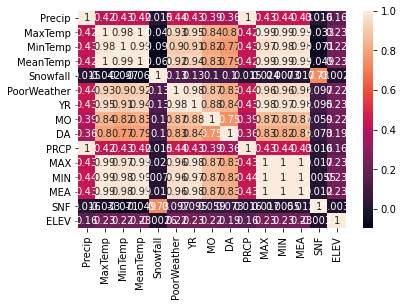

In [49]:
sns.heatmap(dataset.corr(), annot=True)

In [50]:
len(dataset.corr())

15

               Precip   MaxTemp   MinTemp  MeanTemp  Snowfall  PoorWeather  \
Precip       1.000000  0.416611  0.426975  0.422528  0.015255     0.439410   
MaxTemp      0.416611  1.000000  0.984482  0.997177 -0.042191     0.927682   
MinTemp      0.426975  0.984482  1.000000  0.994734 -0.096894     0.903821   
MeanTemp     0.422528  0.997177  0.994734  1.000000 -0.065607     0.920811   
Snowfall     0.015255 -0.042191 -0.096894 -0.065607  1.000000     0.132062   
PoorWeather  0.439410  0.927682  0.903821  0.920811  0.132062     1.000000   
YR           0.429265  0.949933  0.913332  0.937965  0.129251     0.977450   
MO           0.389095  0.842122  0.815395  0.833913  0.100155     0.868857   
DA           0.362363  0.802543  0.771709  0.792474  0.100835     0.825876   
PRCP         1.000000  0.417349  0.427865  0.423334  0.015244     0.440162   
MAX          0.426588  0.992661  0.968833  0.986281  0.024295     0.958138   
MIN          0.437521  0.990276  0.981755  0.990361  0.007311   

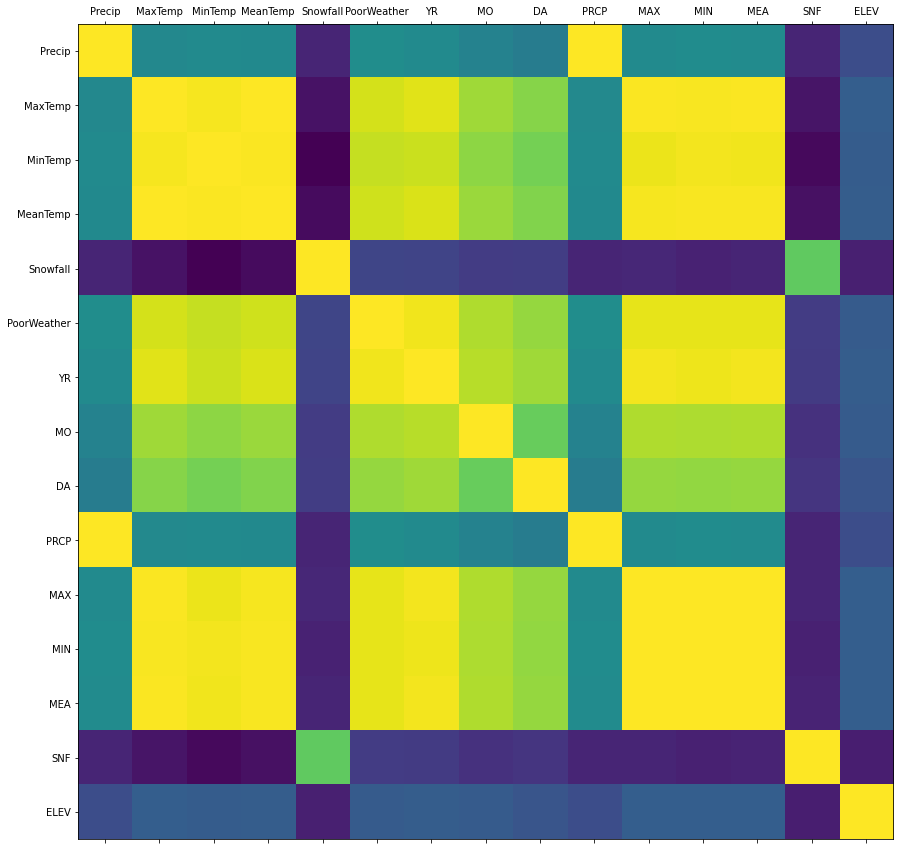

In [51]:
def plot_corr(df):
    
    corr = df.corr()    # data frame correlation function
    print(corr)
    size = len(df.corr())
    fig, ax = plt.subplots(figsize=(size, size))#The subplots command in the background will call plt.figure(), and any keywords will be passed along
    ax.matshow(corr)   # heatmap with matshow, color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks
    
plot_corr(dataset)

In [52]:
dataset.head()

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,ELEV
0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0


In [53]:
# Removing Correlated features

del dataset['SNF']
del dataset['PRCP']
del dataset['MaxTemp']
del dataset['MinTemp']
del dataset['MIN']
del dataset['MAX']
del dataset['MEA']

In [54]:
dataset.head()

,Precip,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,ELEV
0,0.0,0.0,0.0,0.0,0,0,0,0
1,0.0,0.0,0.0,0.0,0,0,0,0
2,0.0,0.0,0.0,0.0,0,0,0,0
3,0.0,0.0,0.0,0.0,0,0,0,0
4,0.0,0.0,0.0,0.0,0,0,0,0


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101344 entries, 0 to 119039
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Precip       101344 non-null  float64
 1   MeanTemp     101344 non-null  float64
 2   Snowfall     101344 non-null  float64
 3   PoorWeather  101344 non-null  float64
 4   YR           101344 non-null  int32  
 5   MO           101344 non-null  int32  
 6   DA           101344 non-null  int32  
 7   ELEV         101344 non-null  int32  
dtypes: float64(4), int32(4)
memory usage: 5.4 MB


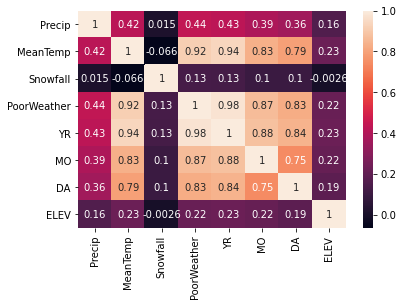

In [56]:
# Checking Correlation again
sns.heatmap(dataset.corr(), annot=True)

               Precip  MeanTemp  Snowfall  PoorWeather        YR        MO  \
Precip       1.000000  0.422528  0.015255     0.439410  0.429265  0.389095   
MeanTemp     0.422528  1.000000 -0.065607     0.920811  0.937965  0.833913   
Snowfall     0.015255 -0.065607  1.000000     0.132062  0.129251  0.100155   
PoorWeather  0.439410  0.920811  0.132062     1.000000  0.977450  0.868857   
YR           0.429265  0.937965  0.129251     0.977450  1.000000  0.882262   
MO           0.389095  0.833913  0.100155     0.868857  0.882262  1.000000   
DA           0.362363  0.792474  0.100835     0.825876  0.843619  0.745720   
ELEV         0.160950  0.228002 -0.002594     0.218404  0.227186  0.216527   

                   DA      ELEV  
Precip       0.362363  0.160950  
MeanTemp     0.792474  0.228002  
Snowfall     0.100835 -0.002594  
PoorWeather  0.825876  0.218404  
YR           0.843619  0.227186  
MO           0.745720  0.216527  
DA           1.000000  0.190395  
ELEV         0.190395  1.

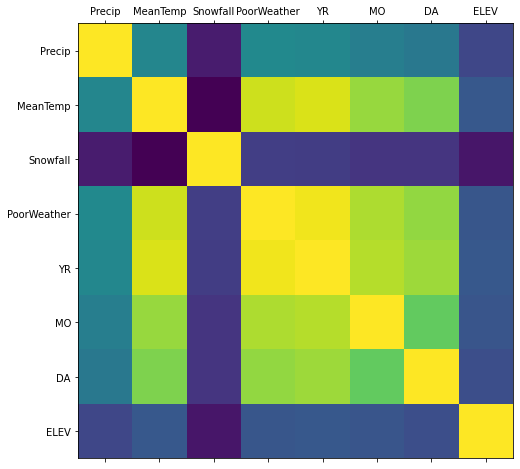

In [57]:
plot_corr(dataset)

In [58]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101344 entries, 0 to 119039
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Precip       101344 non-null  float64
 1   MeanTemp     101344 non-null  float64
 2   Snowfall     101344 non-null  float64
 3   PoorWeather  101344 non-null  float64
 4   YR           101344 non-null  int32  
 5   MO           101344 non-null  int32  
 6   DA           101344 non-null  int32  
 7   ELEV         101344 non-null  int32  
dtypes: float64(4), int32(4)
memory usage: 5.4 MB
None


In [59]:
dataset.head()

,Precip,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,ELEV
0,0.0,0.0,0.0,0.0,0,0,0,0
1,0.0,0.0,0.0,0.0,0,0,0,0
2,0.0,0.0,0.0,0.0,0,0,0,0
3,0.0,0.0,0.0,0.0,0,0,0,0
4,0.0,0.0,0.0,0.0,0,0,0,0


In [60]:
# Verifying dataset

print(dataset['Precip'].unique())
print(dataset['MeanTemp'].unique())
print(dataset['Snowfall'].unique())
print(dataset['PoorWeather'].unique())
print(dataset['YR'].unique())
print(dataset['MO'].unique())
print(dataset['DA'].unique())
print(dataset['ELEV'].unique())

[  0.      0.254   1.778   2.54    0.508   1.016   0.762   4.826   4.318
   6.096   2.032   9.144   6.604   4.572   9.906   9.652   1.524  13.97
   6.35    5.334   1.27    2.794   5.588  13.716   8.128  22.352   3.556
  39.116  36.068  11.938  98.044   3.81   14.986  13.462  78.232 146.304
  14.732   5.842  21.844  17.78   26.67  120.904  42.164  23.368   4.064
  21.082  44.958   2.286  25.654  50.038  17.526  51.054   8.382   3.048
  25.4     5.08    7.366  16.256   7.112   8.89   24.638  11.684  17.018
 144.78   18.034  10.668  50.8   106.426  36.576  53.34   34.798  12.954
   7.874  26.416  85.598  47.498  12.7    17.272  11.176  59.182  33.782
  40.894  28.194  33.528  24.892  14.478   3.302  71.628  31.496  36.322
  29.464   9.398  10.16   15.748   6.858  16.002   7.62   45.974  18.796
  14.224  68.326  27.178 116.586  21.336  42.926  37.592  38.608  28.956
  50.546   8.636  29.972  48.26   43.942  26.924  76.708  52.07   11.43
  30.734  52.324  35.306 120.396  12.192  34.29   80.

In [61]:
print(dataset.shape)

(101344, 8)


### Removing rows with every value == 0

In [62]:
print(len(dataset.loc[(dataset==0).all(axis=1)]))
dataset.drop(dataset.loc[(dataset==0).all(axis=1)].index, inplace=True)
print(dataset.shape)

77286
(24058, 8)


In [63]:
dataset.head()

,Precip,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,ELEV
403,0.254,22.777778,0.0,1.0,43,8,8,62
420,1.778,22.777778,0.0,1.0,43,8,25,62
421,2.540,23.333333,0.0,1.0,43,8,26,62
422,0.508,22.777778,0.0,1.0,43,8,27,62
426,1.016,23.888889,0.0,1.0,43,8,31,62


In [64]:
print(len(dataset.loc[dataset['Precip']==0].index))
print(len(dataset.loc[dataset['MeanTemp']==0].index))
print(len(dataset.loc[dataset['YR']==0].index))
print(len(dataset.loc[dataset['MO']==0].index))
print(len(dataset.loc[dataset['ELEV']==0].index))

3159
38
0
0
0


## Independent and dependent values

In [65]:
X = dataset.iloc[:, [0,1,4,5,6,7]]
Y = dataset.iloc[:, [2,3]]

In [66]:
print(X)

        Precip   MeanTemp  YR  MO  DA  ELEV
403      0.254  22.777778  43   8   8    62
420      1.778  22.777778  43   8  25    62
421      2.540  23.333333  43   8  26    62
422      0.508  22.777778  43   8  27    62
426      1.016  23.888889  43   8  31    62
...        ...        ...  ..  ..  ..   ...
119026  19.812  25.000000  45  12  18     2
119027  10.160  22.222222  45  12  19     2
119033   0.508  23.888889  45  12  25     2
119036   9.906  23.888889  45  12  28     2
119037   0.000  23.333333  45  12  29     2

[24058 rows x 6 columns]


In [67]:
print(Y)

        Snowfall  PoorWeather
403          0.0          1.0
420          0.0          1.0
421          0.0          1.0
422          0.0          1.0
426          0.0          1.0
...          ...          ...
119026       0.0          1.0
119027       0.0          1.0
119033       0.0          1.0
119036       0.0          1.0
119037       0.0          1.0

[24058 rows x 2 columns]


## Splitting the Data

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [69]:
snowfall_train, poor_weather_train = np.hsplit(Y_train, 2)
snowfall_test, poor_weather_test = np.hsplit(Y_test, 2)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16840, 6)
(7218, 6)
(16840, 2)
(7218, 2)


In [71]:
print(len(dataset.loc[dataset['Snowfall']==0].index))
print(len(dataset.loc[dataset['Snowfall']==1].index))
print(len(dataset.loc[dataset['PoorWeather']==0].index))
print(len(dataset.loc[dataset['PoorWeather']==1].index))

23535
523
825
23233


## Linear Logistic Regression

In [72]:
dataset.head()

,Precip,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,ELEV
403,0.254,22.777778,0.0,1.0,43,8,8,62
420,1.778,22.777778,0.0,1.0,43,8,25,62
421,2.540,23.333333,0.0,1.0,43,8,26,62
422,0.508,22.777778,0.0,1.0,43,8,27,62
426,1.016,23.888889,0.0,1.0,43,8,31,62


In [73]:
from sklearn.linear_model import LogisticRegression

classifier_lr_snowfall = LogisticRegression(random_state = 42)
classifier_lr_poor_weather = LogisticRegression(random_state = 42)

## For Snowfall

In [74]:
classifier_lr_snowfall.fit(X_train,np.ravel(snowfall_train).reshape(-1))

LogisticRegression(random_state=42)

In [75]:
snowfall_train_predict = classifier_lr_snowfall.predict(X_train)
snowfall_test_predict = classifier_lr_snowfall.predict(X_test)

In [76]:
print(len(snowfall_train))
print(len(snowfall_train_predict))
print(len(snowfall_test))
print(len(snowfall_test_predict))

16840
16840
7218
7218


In [77]:
# Training Data

print("Training Data: " + str(accuracy_score(snowfall_train, snowfall_train_predict)))
print("Confusion Matrix \n" + str(confusion_matrix(snowfall_train, snowfall_train_predict)))

Training Data: 0.9940023752969122
Confusion Matrix 
[[16441    30]
 [   71   298]]


In [78]:
# Test Data

print("Test Data: " + str(accuracy_score(snowfall_test, snowfall_test_predict)))
print("Confusion Matrix \n" + str(confusion_matrix(snowfall_test, snowfall_test_predict)))

Test Data: 0.9923801607093378
Confusion Matrix 
[[7047   17]
 [  38  116]]


## For PoorWeather

In [79]:
classifier_lr_poor_weather.fit(X_train,np.ravel(poor_weather_train).reshape(-1))

LogisticRegression(random_state=42)

In [80]:
poor_weather_train_predict = classifier_lr_poor_weather.predict(X_train)
poor_weather_test_predict = classifier_lr_poor_weather.predict(X_test)

In [81]:
# Training Data

print("Training Data: " + str(accuracy_score(poor_weather_train, poor_weather_train_predict)))
print("Confusion Matrix \n" + str(confusion_matrix(poor_weather_train, poor_weather_train_predict)))

Training Data: 0.9644893111638955
Confusion Matrix 
[[    0   562]
 [   36 16242]]


In [82]:
# Test Data

print("Test Data: " + str(accuracy_score(poor_weather_test, poor_weather_test_predict)))
print("Confusion Matrix \n" + str(confusion_matrix(poor_weather_test, poor_weather_test_predict)))

Test Data: 0.9623164311443613
Confusion Matrix 
[[   0  263]
 [   9 6946]]


## Naive Bayes Theorum

In [83]:
dataset.head()

,Precip,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,ELEV
403,0.254,22.777778,0.0,1.0,43,8,8,62
420,1.778,22.777778,0.0,1.0,43,8,25,62
421,2.540,23.333333,0.0,1.0,43,8,26,62
422,0.508,22.777778,0.0,1.0,43,8,27,62
426,1.016,23.888889,0.0,1.0,43,8,31,62


In [84]:
from sklearn.naive_bayes import GaussianNB
nb_model_snowfall = GaussianNB()
nb_model_poor_weather = GaussianNB()

## For Snowfall

In [85]:
nb_model_snowfall.fit(X_train, np.ravel(snowfall_train).reshape(-1))

GaussianNB()

In [86]:
snowfall_train_predict = nb_model_snowfall.predict(X_train)
snowfall_test_predict = nb_model_snowfall.predict(X_test)

In [87]:
# Training Data

print("Training Data: " + str(accuracy_score(snowfall_train, snowfall_train_predict)))
print("Confusion Matrix \n" + str(confusion_matrix(snowfall_train, snowfall_train_predict)))

Training Data: 0.9581947743467933
Confusion Matrix 
[[15788   683]
 [   21   348]]


In [88]:
# Test Data

print("Test Data: " + str(accuracy_score(snowfall_test, snowfall_test_predict)))
print("Confusion Matrix \n" + str(confusion_matrix(snowfall_test, snowfall_test_predict)))

Test Data: 0.9520642837351067
Confusion Matrix 
[[6725  339]
 [   7  147]]


## For PoorWeather

In [89]:
nb_model_poor_weather.fit(X_train,np.ravel(poor_weather_train).reshape(-1))

GaussianNB()

In [90]:
poor_weather_train_predict = nb_model_poor_weather.predict(X_train)
poor_weather_test_predict = nb_model_poor_weather.predict(X_test)

In [91]:
# Training Data

print("Training Data: " + str(accuracy_score(poor_weather_train, poor_weather_train_predict)))
print("Confusion Matrix \n" + str(confusion_matrix(poor_weather_train, poor_weather_train_predict)))

Training Data: 0.9039192399049881
Confusion Matrix 
[[  562     0]
 [ 1618 14660]]


In [92]:
# Test Data

print("Test Data: " + str(accuracy_score(poor_weather_test, poor_weather_test_predict)))
print("Confusion Matrix \n" + str(confusion_matrix(poor_weather_test, poor_weather_test_predict)))

Test Data: 0.9131338320864505
Confusion Matrix 
[[ 263    0]
 [ 627 6328]]
